# MMFewShot Tutorial-Detection

Welcome to MMFewShot! This is the official colab tutorial for using MMFewShot for detection task. In this tutorial, you will learn to

* How to do inference with MMFewShot trained weight.

Let's start!

## Install MMFewShot

This step may take several minutes.

We use PyTorch 1.10 and CUDA 11.1 for this tutorial. You may install other versions by change the version number in pip install command.

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.6 MB/s eta 0:12:52tcmalloc: large alloc 1147494400 bytes == 0x38dce000 @  0x7f1d7b73d615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████▌               | 1055.7 MB 1.3 MB/s eta 0:12:15tcmalloc: large alloc 1434370048 bytes == 0x7d424000 @  0x7f1d7b73d615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████████           | 1336.2 MB 1.7 MB/s eta 0:07:02tcmalloc: large alloc 1792966656 bytes =

In [3]:
# Install mmcv-full dependency via openmim
!pip install openmim
!mim install mmcv-full

  Created wheel for openmim: filename=openmim-0.1.5-py2.py3-none-any.whl size=42503 sha256=e70b13448feea260646e74a82d281e85bac0464441176304788396a80511c101
  Stored in directory: /root/.cache/pip/wheels/16/8b/e1/bdebbbc687aa50224a5ce46fe97a040a0c59f92b34bfc750b6
Successfully built openmim
installing mmcv-full from wheel.
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html
     |████████████████████████████████| 45.5 MB 10.2 MB/s 
     |████████████████████████████████| 190 kB 5.3 MB/s 


In [4]:
# install mmclassification mmdetection
!mim install mmcls
!mim install mmdet

installing mmcls from https://github.com/open-mmlab/mmclassification.git.
Cloning into '/tmp/tmp8fqm761l/mmclassification'...
remote: Enumerating objects: 6608, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 6608 (delta 1), reused 7 (delta 0), pack-reused 6600
Receiving objects: 100% (6608/6608), 9.37 MiB | 21.08 MiB/s, done.
Resolving deltas: 100% (4397/4397), done.
Note: checking out '7c5ddb1e5bee68d52ff8b5622cdbd75c02792c07'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

Processing /tmp/tmp8fqm761l/mmclassification
  Created wheel for mmcls: filename=mmcls-0.23.0-py2.p

In [5]:
# Install MMFewShot
!rm -rf mmfewshot
!git clone https://github.com/open-mmlab/mmfewshot.git
%cd mmfewshot
!pip install -r requirements/build.txt
!pip install -e .

Cloning into 'mmfewshot'...
remote: Enumerating objects: 3467, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 3467 (delta 88), reused 129 (delta 60), pack-reused 3292
Receiving objects: 100% (3467/3467), 4.51 MiB | 18.38 MiB/s, done.
Resolving deltas: 100% (2129/2129), done.
/content/mmfewshot
Obtaining file:///content/mmfewshot
  Running setup.py develop for mmfewshot


In [6]:
from mmcv import collect_env
collect_env()

{'CUDA available': True,
 'CUDA_HOME': '/usr/local/cuda',
 'GCC': 'x86_64-linux-gnu-gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0',
 'GPU 0': 'Tesla K80',
 'MMCV': '1.5.0',
 'MMCV CUDA Compiler': '11.1',
 'MMCV Compiler': 'GCC 7.3',
 'NVCC': 'Cuda compilation tools, release 11.1, V11.1.105',
 'OpenCV': '4.1.2',
 'PyTorch': '1.9.0+cu111',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 7.3\n  - C++ Version: 201402\n  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.1\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=com

In [7]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMFewShot installation
import mmfewshot
print(mmfewshot.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.9.0+cu111 True
0.1.0
11.1
GCC 7.3


## Run Inference with MMFewShot trained weight


In [8]:
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmfewshot/detection/attention_rpn/coco/attention-rpn_r50_c4_4xb2_coco_base-training_20211102_003348-da28cdfd.pth -O checkpoints/attention-rpn_r50_c4_4xb2_coco_base-training_20211102_003348-da28cdfd.pth

--2022-05-04 05:59:00--  https://download.openmmlab.com/mmfewshot/detection/attention_rpn/coco/attention-rpn_r50_c4_4xb2_coco_base-training_20211102_003348-da28cdfd.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255944280 (244M) [application/octet-stream]
Saving to: ‘checkpoints/attention-rpn_r50_c4_4xb2_coco_base-training_20211102_003348-da28cdfd.pth’

checkpoints/attenti 100%[===================>] 244.09M  8.28MB/s    in 30s     

2022-05-04 05:59:32 (8.01 MB/s) - ‘checkpoints/attention-rpn_r50_c4_4xb2_coco_base-training_20211102_003348-da28cdfd.pth’ saved [255944280/255944280]



load checkpoint from local path: checkpoints/attention-rpn_r50_c4_4xb2_coco_base-training_20211102_003348-da28cdfd.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


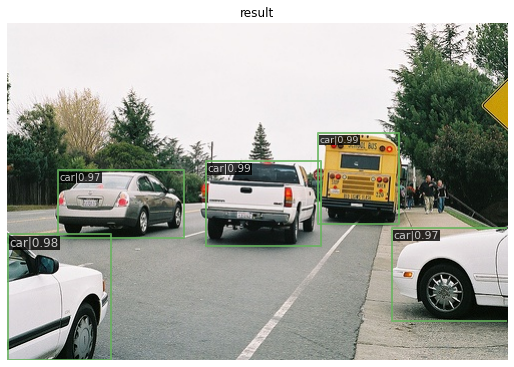

In [9]:
import os

from mmdet.apis import show_result_pyplot

from mmfewshot.detection.apis import (inference_detector, init_detector,
                                      process_support_images)

# Choose to use a config and initialize the detector
config = 'configs/detection/attention_rpn/coco/attention-rpn_r50_c4_4xb2_coco_base-training.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/attention-rpn_r50_c4_4xb2_coco_base-training_20211102_003348-da28cdfd.pth'
# Support image file
support_images_dir = 'demo/demo_detection_images/support_images'
# Query image file
image = 'demo/demo_detection_images/query_images/demo_query.jpg'
# score_thr
score_thr=0.3
# Set the device to be used for evaluation
device='cuda:0'


# build the model from a config file and a checkpoint file
model = init_detector(config, checkpoint, device=device)

# prepare support images, each demo image only contain one instance
files = os.listdir(support_images_dir)
support_images = [
    os.path.join(support_images_dir, file) for file in files
]
classes = [file.split('.')[0] for file in files]
support_labels = [[file.split('.')[0]] for file in files]
process_support_images(
    model, support_images, support_labels, classes=classes)
# test a single image
result = inference_detector(model, image)
show_result_pyplot(model, image, result, score_thr=score_thr)